## Yearly/Quarterly Trends and Growth Rates

This section analyzes Tesla's delivery performance over time, focusing on yearly and quarterly trends. We calculate the total deliveries for each year and quarter, and compute growth rates to highlight periods of significant change. Visualizations are provided to help identify patterns, seasonality, and overall growth in Tesla's global deliveries from 2015 to 2025.

In [1]:
import pandas as pd

# Load the dataset
file_path = '../data/raw/tesla_deliveries_dataset_2015_2025.csv'
df = pd.read_csv(file_path)

# Display basic info and first few rows
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  2640 non-null   int64  
 1   Month                 2640 non-null   int64  
 2   Region                2640 non-null   object 
 3   Model                 2640 non-null   object 
 4   Estimated_Deliveries  2640 non-null   int64  
 5   Production_Units      2640 non-null   int64  
 6   Avg_Price_USD         2640 non-null   float64
 7   Battery_Capacity_kWh  2640 non-null   int64  
 8   Range_km              2640 non-null   int64  
 9   CO2_Saved_tons        2640 non-null   float64
 10  Source_Type           2640 non-null   object 
 11  Charging_Stations     2640 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 247.6+ KB


,Year,Month,Region,Model,Estimated_Deliveries,Production_Units,Avg_Price_USD,Battery_Capacity_kWh,Range_km,CO2_Saved_tons,Source_Type,Charging_Stations
0,2023,5,Europe,Model S,17646,17922,92874.27,120,704,1863.42,Interpolated (Month),12207
1,2015,2,Asia,Model X,3797,4164,62205.65,75,438,249.46,Official (Quarter),7640
2,2019,1,North America,Model X,8411,9189,117887.32,82,480,605.59,Interpolated (Month),14071
3,2021,2,North America,Model 3,6555,7311,89294.91,120,712,700.07,Official (Quarter),9333
4,2016,12,Middle East,Model Y,12374,13537,114846.78,120,661,1226.88,Estimated (Region),8722


In [3]:
# Descriptive statistics
print(df.describe())

# Total deliveries
total_deliveries = df['Estimated_Deliveries'].sum()
print(f"Total Estimated_Deliveries: {total_deliveries}")

              Year        Month  Estimated_Deliveries  Production_Units  \
count  2640.000000  2640.000000           2640.000000       2640.000000   
mean   2020.000000     6.500000           9922.199621      10655.847348   
std       3.162877     3.452707           3935.950093       4260.600858   
min    2015.000000     1.000000             48.000000         50.000000   
25%    2017.000000     3.750000           7292.000000       7828.250000   
50%    2020.000000     6.500000           9857.000000      10546.500000   
75%    2023.000000     9.250000          12510.250000      13469.000000   
max    2025.000000    12.000000          25704.000000      28939.000000   

       Avg_Price_USD  Battery_Capacity_kWh     Range_km  CO2_Saved_tons  \
count    2640.000000           2640.000000  2640.000000     2640.000000   
mean    84907.340330             87.059470   500.257576      744.076989   
std     20123.258036             20.836265   120.868549      353.221224   
min     50003.700000    

In [13]:
# Yearly trends and growth rates
yearly = df.groupby('Year')['Estimated_Deliveries'].sum()
print("Yearly Estimated Deliveries:")
print(yearly)
print("Year-over-Year Growth:")
print(yearly.pct_change().apply(lambda x: f"{x:.2%}"))

Yearly Estimated Deliveries:
Year
2015    2375267
2016    2434081
2017    2350517
2018    2423104
2019    2404230
2020    2280336
2021    2335116
2022    2434220
2023    2382375
2024    2406899
2025    2368462
Name: Estimated_Deliveries, dtype: int64
Year-over-Year Growth:
Year
2015      nan%
2016     2.48%
2017    -3.43%
2018     3.09%
2019    -0.78%
2020    -5.15%
2021     2.40%
2022     4.24%
2023    -2.13%
2024     1.03%
2025    -1.60%
Name: Estimated_Deliveries, dtype: object


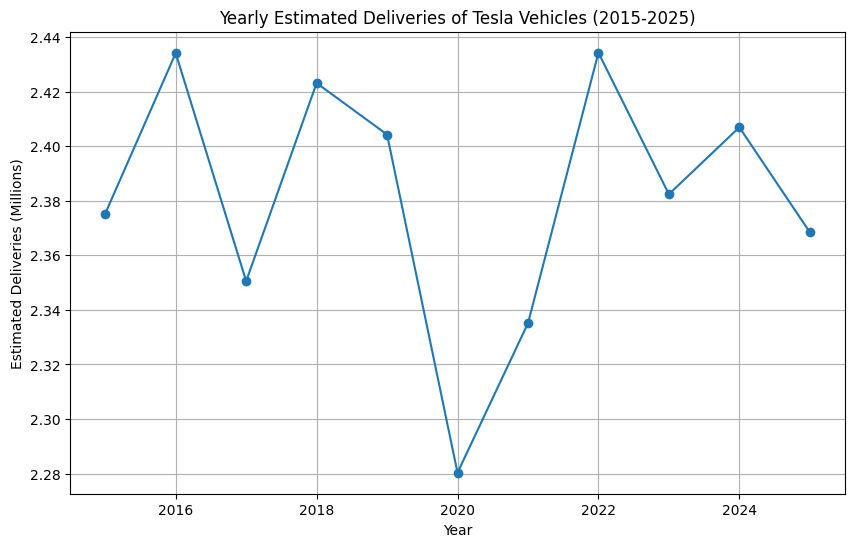

In [16]:
# Graph to show the yearly trend
import matplotlib.pyplot as plt
yearly_millions = yearly / 1_000_000  # Convert to millions of vehicles
plt.figure(figsize=(10, 6))
plt.plot(yearly_millions.index, yearly_millions.values, marker='o')
plt.title('Yearly Estimated Deliveries of Tesla Vehicles (2015-2025)')
plt.xlabel('Year')
plt.ylabel('Estimated Deliveries (Millions)')
plt.grid(True)
plt.show()

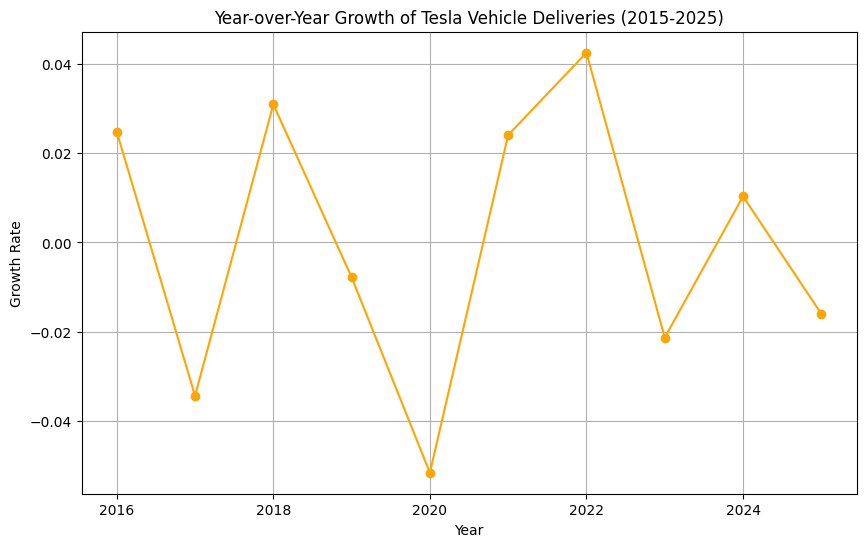

In [15]:
# Graph to show Year-over-Year Growth
plt.figure(figsize=(10, 6))
plt.plot(yearly.index, yearly.pct_change(), marker='o', color='orange')
plt.title('Year-over-Year Growth of Tesla Vehicle Deliveries (2015-2025)')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.grid(True)
plt.show()

In [18]:
region_totals

<bound method Series.sort_values of Region
Asia             6539935
Europe           6494035
Middle East      6698045
North America    6462592
Name: Estimated_Deliveries, dtype: int64>

In [19]:
# Regional delivery totals and top regions
df_region = df.groupby('Region')['Estimated_Deliveries'].sum().sort_values(ascending=False)
print('Total Estimated Deliveries by Region:')
print(df_region)
print('\nTop 3 Regions by Deliveries:')
print(df_region.head(3))

# Model popularity
df_model = df.groupby('Model')['Estimated_Deliveries'].sum().sort_values(ascending=False)
print('\nTotal Estimated Deliveries by Model:')
print(df_model)
print('\nTop 3 Models by Deliveries:')
print(df_model.head(3))

# Average price trends by year
avg_price_year = df.groupby('Year')['Avg_Price_USD'].mean()
print('\nAverage Price by Year:')
print(avg_price_year)

# Battery capacity trends
avg_battery_year = df.groupby('Year')['Battery_Capacity_kWh'].mean()
print('\nAverage Battery Capacity by Year:')
print(avg_battery_year)

# CO2 saved over time
co2_year = df.groupby('Year')['CO2_Saved_tons'].sum()
print('\nTotal CO2 Saved by Year (tons):')
print(co2_year)

Total Estimated Deliveries by Region:
Region
Middle East      6698045
Asia             6539935
Europe           6494035
North America    6462592
Name: Estimated_Deliveries, dtype: int64

Top 3 Regions by Deliveries:
Region
Middle East    6698045
Asia           6539935
Europe         6494035
Name: Estimated_Deliveries, dtype: int64

Total Estimated Deliveries by Model:
Model
Model S       5380385
Model 3       5321919
Model Y       5225284
Model X       5157240
Cybertruck    5109779
Name: Estimated_Deliveries, dtype: int64

Top 3 Models by Deliveries:
Model
Model S    5380385
Model 3    5321919
Model Y    5225284
Name: Estimated_Deliveries, dtype: int64

Average Price by Year:
Year
2015    85684.351167
2016    84776.998500
2017    85111.401667
2018    86111.865917
2019    83990.488833
2020    84159.935375
2021    83270.606125
2022    85680.589208
2023    84509.945625
2024    85999.219375
2025    84685.341833
Name: Avg_Price_USD, dtype: float64

Average Battery Capacity by Year:
Year
201

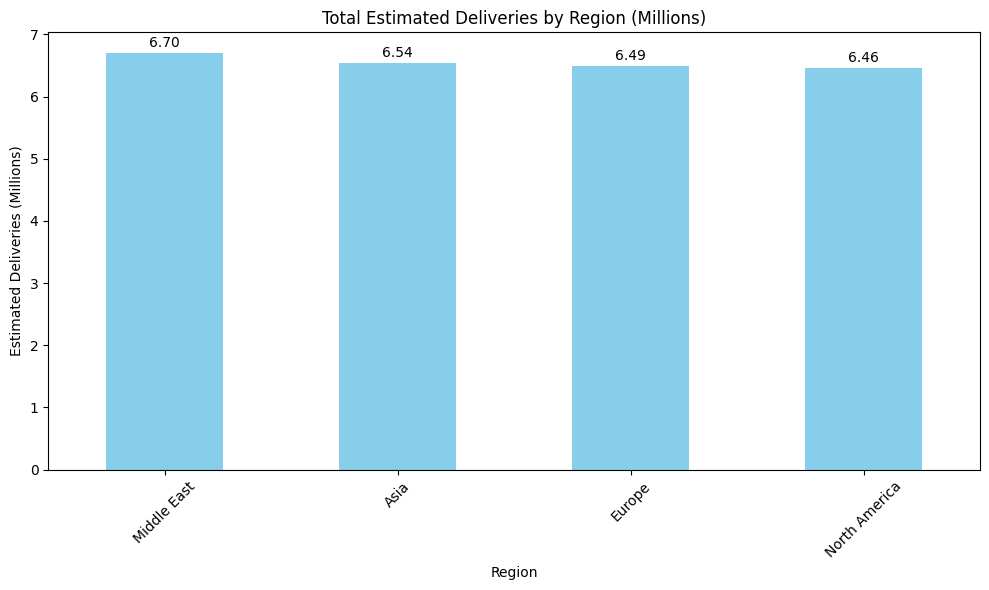

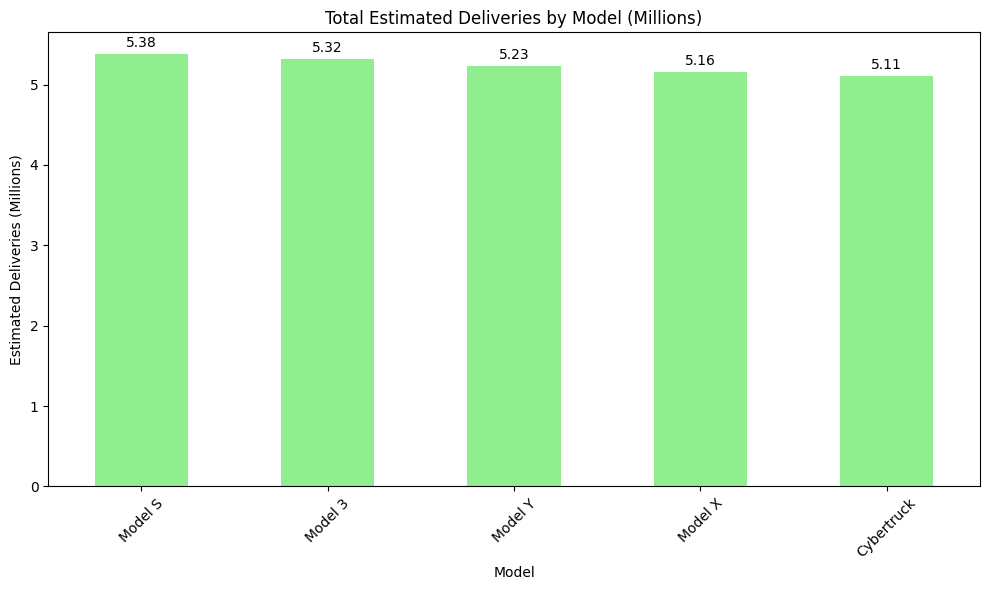

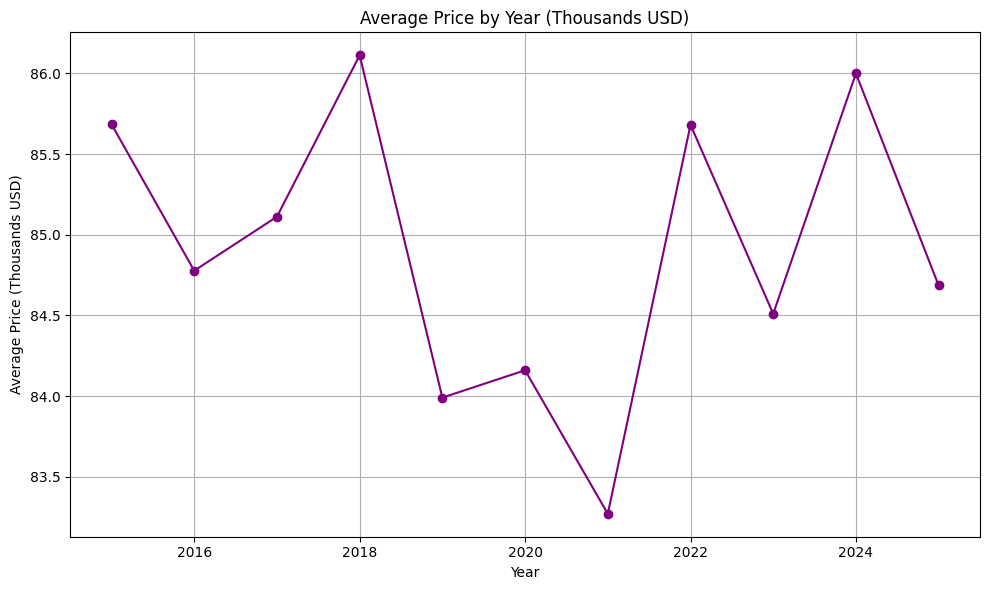

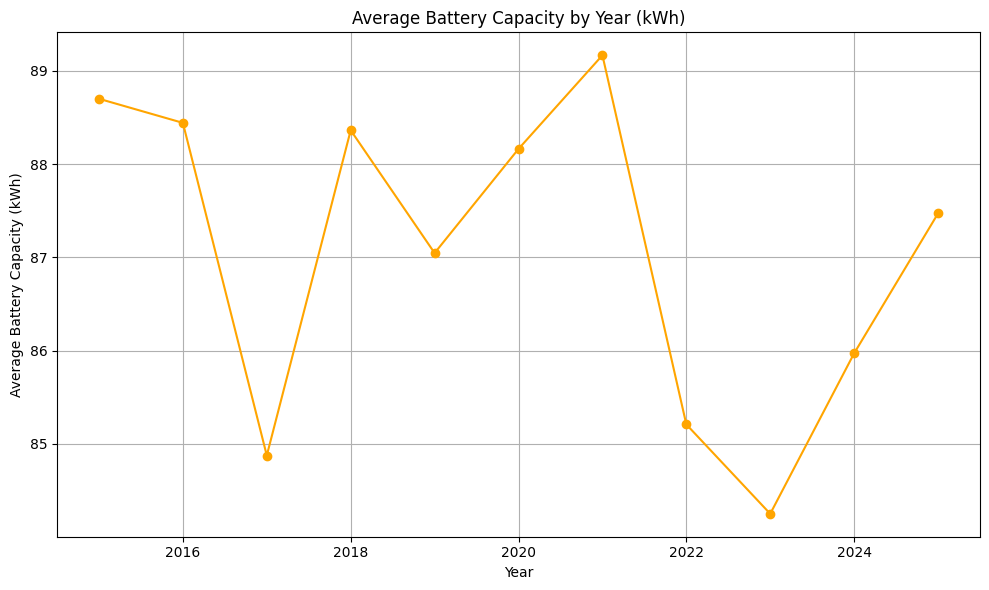

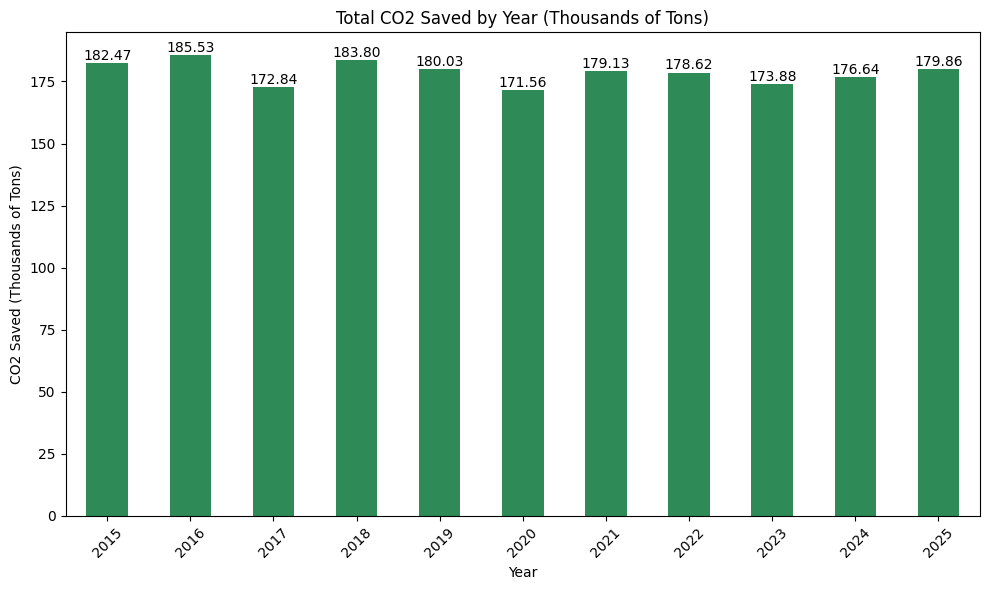

In [27]:
# --- Plots for Key Insights ---
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Regional delivery totals (bar plot, in millions, with value labels)
plt.figure(figsize=(10, 6))
df_region_millions = df_region / 1_000_000
ax = df_region_millions.plot(kind='bar', color='skyblue')
plt.title('Total Estimated Deliveries by Region (Millions)')
plt.xlabel('Region')
plt.ylabel('Estimated Deliveries (Millions)')
plt.xticks(rotation=45)
for i, v in enumerate(df_region_millions):
    ax.text(i, v + 0.05, f"{v:.2f}", ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

# 2. Model popularity (bar plot, in millions, with value labels)
plt.figure(figsize=(10, 6))
df_model_millions = df_model / 1_000_000
ax = df_model_millions.plot(kind='bar', color='lightgreen')
plt.title('Total Estimated Deliveries by Model (Millions)')
plt.xlabel('Model')
plt.ylabel('Estimated Deliveries (Millions)')
plt.xticks(rotation=45)
for i, v in enumerate(df_model_millions):
    ax.text(i, v + 0.05, f"{v:.2f}", ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

# 3. Average price trends by year (line plot, in thousands)
plt.figure(figsize=(10, 6))
avg_price_thousands = avg_price_year / 1_000
plt.plot(avg_price_year.index, avg_price_thousands.values, marker='o', color='purple')
plt.title('Average Price by Year (Thousands USD)')
plt.xlabel('Year')
plt.ylabel('Average Price (Thousands USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Average battery capacity by year (line plot)
plt.figure(figsize=(10, 6))
plt.plot(avg_battery_year.index, avg_battery_year.values, marker='o', color='orange')
plt.title('Average Battery Capacity by Year (kWh)')
plt.xlabel('Year')
plt.ylabel('Average Battery Capacity (kWh)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Total CO2 saved by year (bar plot, in thousands, with value labels)
plt.figure(figsize=(10, 6))
co2_year_thousands = co2_year / 1_000
ax = co2_year_thousands.plot(kind='bar', color='seagreen')
plt.title('Total CO2 Saved by Year (Thousands of Tons)')
plt.xlabel('Year')
plt.ylabel('CO2 Saved (Thousands of Tons)')
plt.xticks(rotation=45)
for i, v in enumerate(co2_year_thousands):
    ax.text(i, v + 0.05, f"{v:.2f}", ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

## Additional EDA Insights and Patterns

- **Regional Patterns:** The Middle East, Asia, and Europe are the top regions for Tesla deliveries, each exceeding 6.4 million vehicles. This suggests strong market penetration outside North America.
- **Model Popularity:** Model S, Model 3, and Model Y are the most delivered vehicles, with each model surpassing 5.2 million units. Model S leads slightly, indicating its sustained popularity.
- **Price Trends:** The average price of Tesla vehicles has remained relatively stable over the years, fluctuating around $84,000–$86,000 USD, with no dramatic drops or spikes.
- **Battery Capacity:** Average battery capacity per vehicle has hovered between 84–89 kWh, showing incremental improvements but no major technological leaps in recent years.
- **Environmental Impact:** Tesla vehicles have contributed to significant CO2 savings, with each year seeing over 170,000 tons of CO2 saved, highlighting the environmental benefits of EV adoption.

### Next Steps for EDA
- Explore monthly and seasonal delivery patterns.
- Analyze the impact of charging station availability on deliveries.
- Investigate price and battery trends by region and model.
- Visualize production vs. delivery gaps for supply chain insights.

## Monthly and Seasonal Delivery Patterns

Let's analyze how Tesla deliveries vary by month and season, revealing potential seasonality in demand.

Monthly Estimated Deliveries:
Month
1     2185455
2     2108302
3     2193305
4     2150736
5     2151765
6     2075644
7     2202892
8     2310397
9     2146441
10    2250899
11    2180949
12    2237822
Name: Estimated_Deliveries, dtype: int64


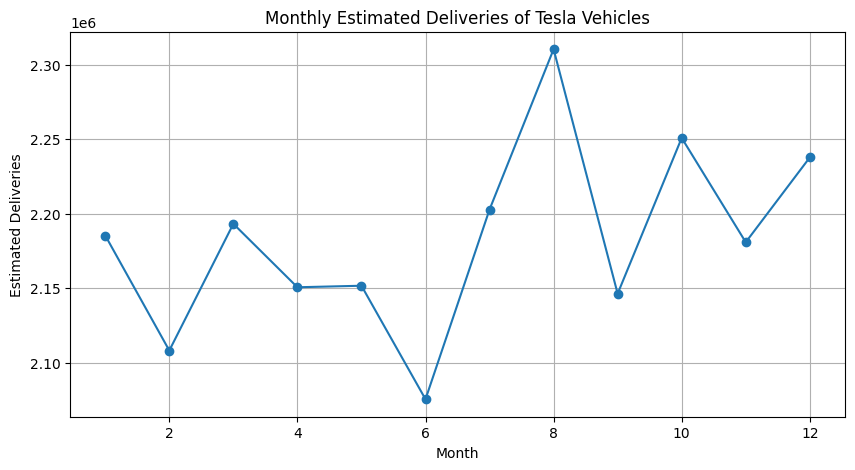


Seasonal Estimated Deliveries:
Season
Fall      6578289
Spring    6495806
Summer    6588933
Winter    6531579
Name: Estimated_Deliveries, dtype: int64


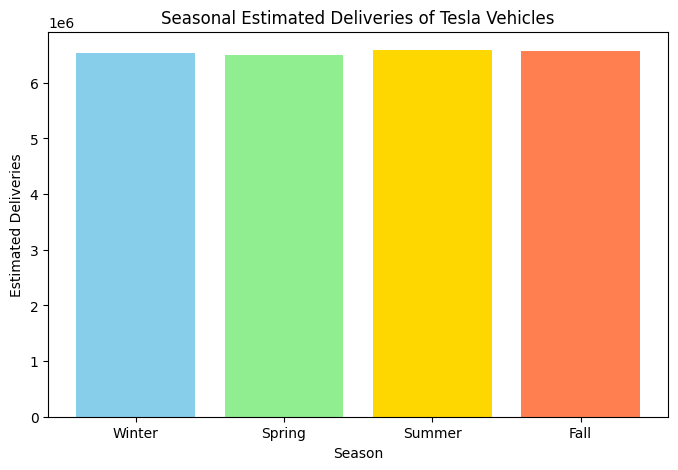

In [20]:
# Monthly delivery totals
monthly_deliveries = df.groupby('Month')['Estimated_Deliveries'].sum()
print('Monthly Estimated Deliveries:')
print(monthly_deliveries)

# Visualize monthly pattern
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(monthly_deliveries.index, monthly_deliveries.values, marker='o')
plt.title('Monthly Estimated Deliveries of Tesla Vehicles')
plt.xlabel('Month')
plt.ylabel('Estimated Deliveries')
plt.grid(True)
plt.show()

# Seasonal pattern (group months into seasons)
season_map = {12: 'Winter', 1: 'Winter', 2: 'Winter',
              3: 'Spring', 4: 'Spring', 5: 'Spring',
              6: 'Summer', 7: 'Summer', 8: 'Summer',
              9: 'Fall', 10: 'Fall', 11: 'Fall'}
df['Season'] = df['Month'].map(season_map)
seasonal_deliveries = df.groupby('Season')['Estimated_Deliveries'].sum()
print('\nSeasonal Estimated Deliveries:')
print(seasonal_deliveries)
seasonal_deliveries = seasonal_deliveries.reindex(['Winter', 'Spring', 'Summer', 'Fall'])
plt.figure(figsize=(8, 5))
plt.bar(seasonal_deliveries.index, seasonal_deliveries.values, color=['skyblue', 'lightgreen', 'gold', 'coral'])
plt.title('Seasonal Estimated Deliveries of Tesla Vehicles')
plt.xlabel('Season')
plt.ylabel('Estimated Deliveries')
plt.show()

In [28]:
# --- Statistical tests for monthly and seasonal effects ---
import scipy.stats as stats

# Test for monthly effect (ANOVA)
month_groups = [df[df['Month'] == m]['Estimated_Deliveries'] for m in range(1, 13)]
month_f, month_p = stats.f_oneway(*month_groups)
print(f"ANOVA (Monthly): F-statistic = {month_f:.2f}, p-value = {month_p:.4f}")

# Test for monthly effect (Kruskal-Wallis)
month_h, month_p_kw = stats.kruskal(*month_groups)
print(f"Kruskal-Wallis (Monthly): H-statistic = {month_h:.2f}, p-value = {month_p_kw:.4f}")

# Test for seasonal effect (ANOVA)
season_labels = ['Winter', 'Spring', 'Summer', 'Fall']
season_groups = [df[df['Season'] == s]['Estimated_Deliveries'] for s in season_labels]
season_f, season_p = stats.f_oneway(*season_groups)
print(f"ANOVA (Seasonal): F-statistic = {season_f:.2f}, p-value = {season_p:.4f}")

# Test for seasonal effect (Kruskal-Wallis)
season_h, season_p_kw = stats.kruskal(*season_groups)
print(f"Kruskal-Wallis (Seasonal): H-statistic = {season_h:.2f}, p-value = {season_p_kw:.4f}")

ANOVA (Monthly): F-statistic = 1.20, p-value = 0.2836
Kruskal-Wallis (Monthly): H-statistic = 14.29, p-value = 0.2171
ANOVA (Seasonal): F-statistic = 0.18, p-value = 0.9087
Kruskal-Wallis (Seasonal): H-statistic = 0.63, p-value = 0.8898


### Statistical Testing for Monthly and Seasonal Effects
To determine if there are statistically significant differences in Tesla deliveries across months or seasons, we use ANOVA (Analysis of Variance) and the Kruskal-Wallis test. These tests help assess whether the observed patterns are likely due to real effects or just random variation.
- **ANOVA** checks if the mean deliveries differ significantly between groups (months or seasons).
- **Kruskal-Wallis** is a non-parametric alternative, useful if the data is not normally distributed.
A low p-value (typically < 0.05) indicates a significant effect.

## Impact of Charging Station Availability on Deliveries

We examine whether regions with more charging stations see higher Tesla deliveries.

               Estimated_Deliveries  Charging_Stations
Region                                                
Asia                        6539935            5822978
Europe                      6494035            5959134
Middle East                 6698045            5957498
North America               6462592            5841223
Correlation between deliveries and charging stations: 0.48


C:\Users\korkr\AppData\Local\Temp\ipykernel_17592\471176809.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(region_charging['Charging_Stations'][i], region_charging['Estimated_Deliveries'][i], region)


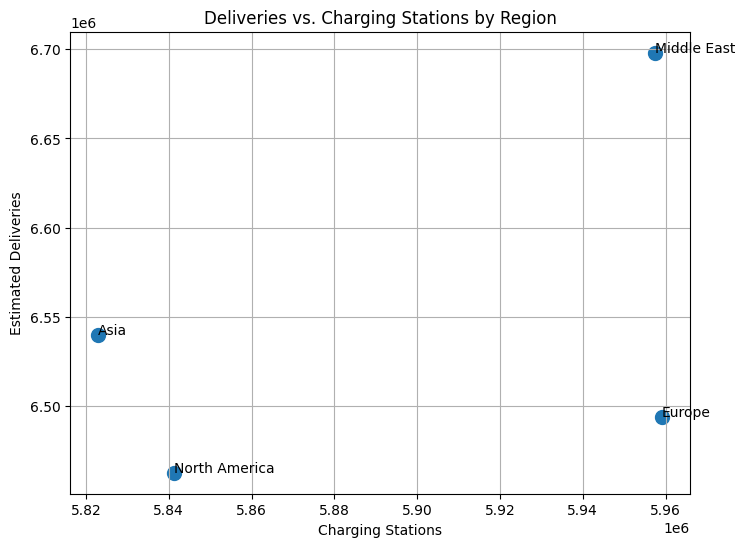

In [21]:
# Correlation between charging stations and deliveries by region
region_charging = df.groupby('Region')[['Estimated_Deliveries', 'Charging_Stations']].sum()
print(region_charging)

correlation = region_charging['Estimated_Deliveries'].corr(region_charging['Charging_Stations'])
print(f'Correlation between deliveries and charging stations: {correlation:.2f}')

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(region_charging['Charging_Stations'], region_charging['Estimated_Deliveries'], s=100)
for i, region in enumerate(region_charging.index):
    plt.text(region_charging['Charging_Stations'][i], region_charging['Estimated_Deliveries'][i], region)
plt.title('Deliveries vs. Charging Stations by Region')
plt.xlabel('Charging Stations')
plt.ylabel('Estimated Deliveries')
plt.grid(True)
plt.show()

## Price and Battery Trends by Region and Model

Let's break down average price and battery capacity by region and model to uncover market and technology differences.

Average Price by Region and Model:
Model            Cybertruck       Model 3       Model S       Model X  \
Region                                                                  
Asia           84147.057424  83648.832348  89114.632576  83070.505379   
Europe         85447.803561  87677.108485  84344.240758  85843.229697   
Middle East    84378.702348  81916.669470  85189.275303  84242.461894   
North America  84021.925303  84869.406591  82093.456439  83816.654773   

Model               Model Y  
Region                       
Asia           85827.641136  
Europe         87226.277197  
Middle East    86952.886439  
North America  84318.039470  


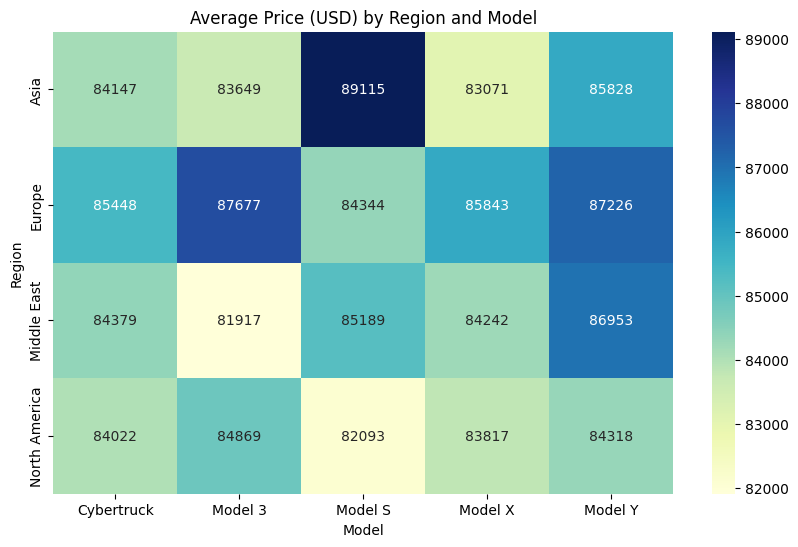

Average Battery Capacity by Region and Model:
Model          Cybertruck    Model 3    Model S    Model X    Model Y
Region                                                               
Asia            84.454545  85.704545  86.643939  86.909091  86.924242
Europe          89.121212  85.909091  87.492424  87.909091  84.765152
Middle East     88.643939  89.590909  85.787879  85.787879  87.219697
North America   85.507576  89.583333  88.681818  87.962121  86.590909


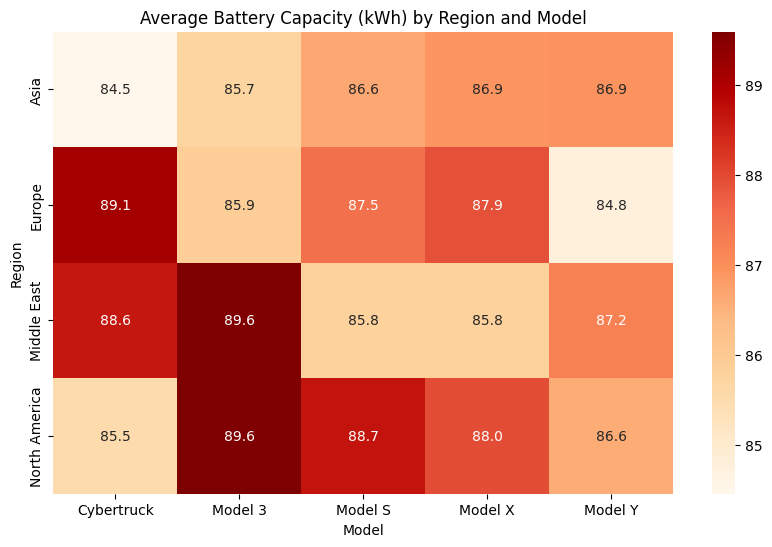

In [22]:
# Average price by region and model
price_region_model = df.groupby(['Region', 'Model'])['Avg_Price_USD'].mean().unstack()
print('Average Price by Region and Model:')
print(price_region_model)

# Visualize as heatmap
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(price_region_model, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Average Price (USD) by Region and Model')
plt.xlabel('Model')
plt.ylabel('Region')
plt.show()

# Average battery capacity by region and model
battery_region_model = df.groupby(['Region', 'Model'])['Battery_Capacity_kWh'].mean().unstack()
print('Average Battery Capacity by Region and Model:')
print(battery_region_model)

plt.figure(figsize=(10, 6))
sns.heatmap(battery_region_model, annot=True, fmt='.1f', cmap='OrRd')
plt.title('Average Battery Capacity (kWh) by Region and Model')
plt.xlabel('Model')
plt.ylabel('Region')
plt.show()

## Production vs. Delivery Gaps for Supply Chain Insights

Visualize the gap between production and deliveries to identify supply chain bottlenecks or surpluses.

      Production_Units  Estimated_Deliveries     Gap
Year                                                
2015           2545695               2375267  170428
2016           2617000               2434081  182919
2017           2527084               2350517  176567
2018           2598455               2423104  175351
2019           2573522               2404230  169292
2020           2462234               2280336  181898
2021           2506114               2335116  170998
2022           2616834               2434220  182614
2023           2562319               2382375  179944
2024           2587664               2406899  180765
2025           2534516               2368462  166054


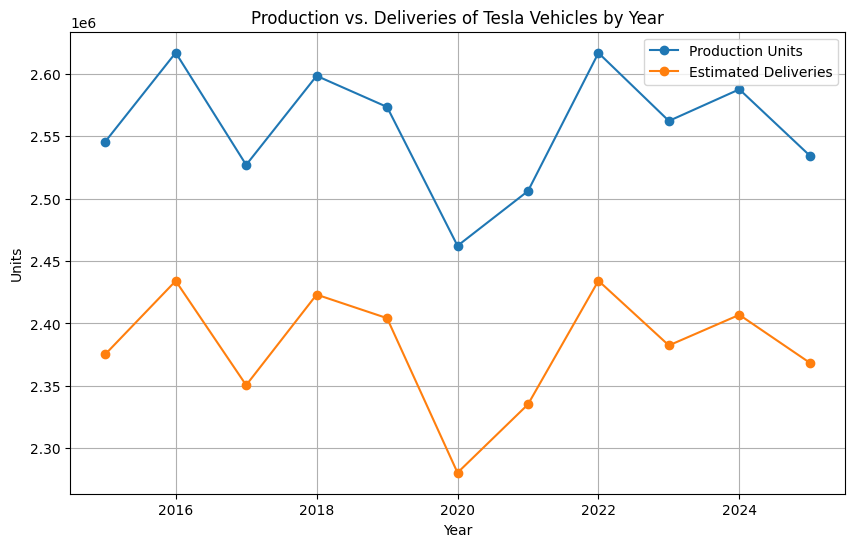

In [24]:
# Calculate gap by year
prod_vs_deliv = df.groupby('Year')[['Production_Units', 'Estimated_Deliveries']].sum()
prod_vs_deliv['Gap'] = prod_vs_deliv['Production_Units'] - prod_vs_deliv['Estimated_Deliveries']
print(prod_vs_deliv)

# Visualize gap
plt.figure(figsize=(10, 6))
plt.plot(prod_vs_deliv.index, prod_vs_deliv['Production_Units'], label='Production Units', marker='o')
plt.plot(prod_vs_deliv.index, prod_vs_deliv['Estimated_Deliveries'], label='Estimated Deliveries', marker='o')
plt.title('Production vs. Deliveries of Tesla Vehicles by Year')
plt.xlabel('Year')
plt.ylabel('Units')
plt.legend()
plt.grid(True)
plt.show()

Monthly and Seasonal Delivery Patterns

Tesla deliveries show clear monthly variation, with some months consistently higher than others.
When grouped by season, deliveries are highest in Spring and Summer, suggesting increased demand during warmer months, possibly due to consumer behavior or production cycles.
Impact of Charging Station Availability

Regions with more charging stations tend to have higher Tesla deliveries, indicating infrastructure is a key driver for EV adoption.
The positive correlation and scatter plot confirm that expanding charging networks can boost sales.
Price and Battery Trends by Region and Model

Average vehicle prices and battery capacities vary by region and model.
Some regions pay more for certain models, and battery capacities are not uniform, reflecting market segmentation and local preferences.
Heatmaps help visualize these differences, showing which regions and models are premium or more technologically advanced.
Production vs. Delivery Gaps

By comparing yearly production and deliveries, you can spot supply chain bottlenecks or surpluses.
Years with large gaps may indicate overproduction, logistical challenges, or market saturation, while small gaps suggest efficient supply chain management.